In [90]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.pipeline import Pipeline

import xgboost
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklift.models import TwoModels
from sklift.metrics import qini_auc_score
from sklift.viz import plot_qini_curve

%matplotlib inline

In [2]:
#Read the dataset
df = pd.read_csv("criteo-uplift-data.csv")

In [3]:
df.shape

(13979592, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979592 entries, 0 to 13979591
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   f0          float64
 1   f1          float64
 2   f2          float64
 3   f3          float64
 4   f4          float64
 5   f5          float64
 6   f6          float64
 7   f7          float64
 8   f8          float64
 9   f9          float64
 10  f10         float64
 11  f11         float64
 12  treatment   int64  
 13  conversion  int64  
 14  visit       int64  
 15  exposure    int64  
dtypes: float64(12), int64(4)
memory usage: 1.7 GB


In [5]:
df.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

In [6]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07,1.397959e+07
mean,1.962030e+01,1.006998e+01,8.446582e+00,4.178923e+00,1.033884e+01,4.028513e+00,-4.155356e+00,5.101765e+00,3.933581e+00,1.602764e+01,5.333396e+00,-1.709672e-01,8.500001e-01,2.916680e-03,4.699200e-02,3.063122e-02
std,5.377464e+00,1.047557e-01,2.993161e-01,1.336645e+00,3.433081e-01,4.310974e-01,4.577914e+00,1.205248e+00,5.665958e-02,7.018975e+00,1.682288e-01,2.283277e-02,3.570713e-01,5.392748e-02,2.116217e-01,1.723164e-01
min,1.261636e+01,1.005965e+01,8.214383e+00,-8.398387e+00,1.028053e+01,-9.011892e+00,-3.142978e+01,4.833815e+00,3.635107e+00,1.319006e+01,5.300375e+00,-1.383941e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.261636e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-6.699321e+00,4.833815e+00,3.910792e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.192341e+01,1.005965e+01,8.214383e+00,4.679882e+00,1.028053e+01,4.115453e+00,-2.411115e+00,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.443646e+01,1.005965e+01,8.723335e+00,4.679882e+00,1.028053e+01,4.115453e+00,2.944427e-01,4.833815e+00,3.971858e+00,1.319006e+01,5.300375e+00,-1.686792e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.674526e+01,1.634419e+01,9.051962e+00,4.679882e+00,2.112351e+01,4.115453e+00,2.944427e-01,1.199840e+01,3.971858e+00,7.529502e+01,6.473917e+00,-1.686792e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


<AxesSubplot:>

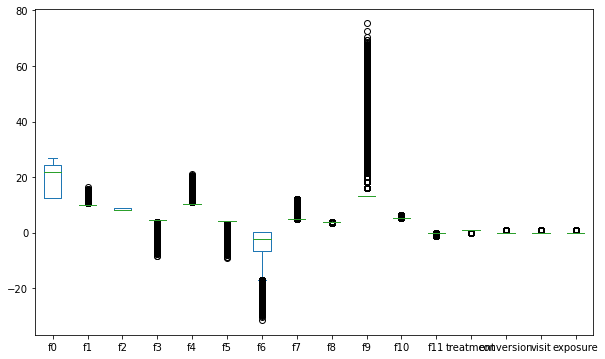

In [7]:
df.plot.box(figsize=(10,6))

In [8]:
df['treatment'].value_counts(normalize = True)

1    0.85
0    0.15
Name: treatment, dtype: float64

<AxesSubplot:xlabel='treatment', ylabel='count'>

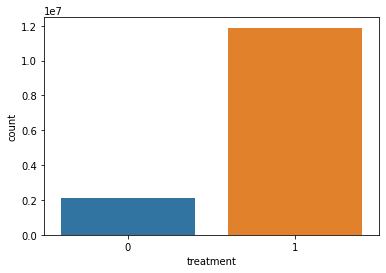

In [9]:
sns.countplot(x=df.treatment)

In [10]:
df['visit'].value_counts(normalize = True)

0    0.953008
1    0.046992
Name: visit, dtype: float64

<AxesSubplot:xlabel='visit', ylabel='count'>

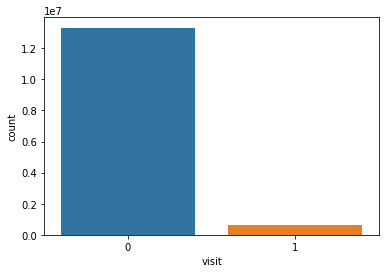

In [11]:
sns.countplot(x=df.visit)

In [12]:
df['conversion'].value_counts(normalize = True)

0    0.997083
1    0.002917
Name: conversion, dtype: float64

<AxesSubplot:xlabel='conversion', ylabel='count'>

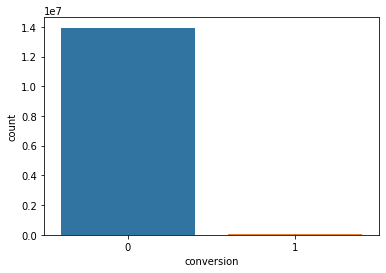

In [13]:
sns.countplot(x=df.conversion)

In [14]:
df['exposure'].value_counts(normalize = True)

0    0.969369
1    0.030631
Name: exposure, dtype: float64

<AxesSubplot:xlabel='exposure', ylabel='count'>

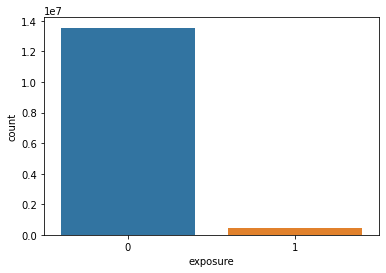

In [15]:
sns.countplot(x=df.exposure)

Text(0.5, 1.0, 'Feature Heatmap')

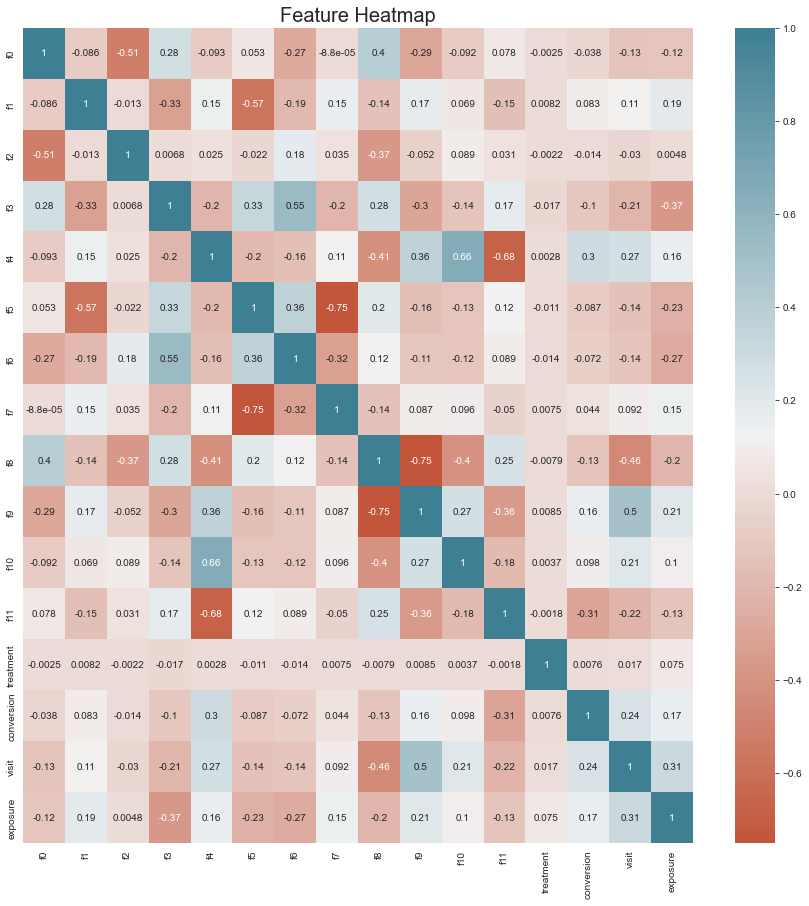

In [16]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True)
plt.title("Feature Heatmap", fontsize = 20)

In [17]:
pd.crosstab(df.treatment, df.visit, normalize='index')

visit,0,1
treatment,,
0,0.961799,0.038201
1,0.951457,0.048543


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [19]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [20]:
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [21]:
#Given the treatment, exposure and visits, how is the conversion?
df.groupby(['treatment','exposure','visit']).agg({'conversion':['mean','sum','count']})

conversion                 
                               mean    sum     count
treatment exposure visit                            
0         0        0       0.000000      0   2016832
                   1       0.050721   4063     80105
1         0        0       0.000000      0  11055129
                   1       0.034259  13680    399314
          1        0       0.000000      0    250702
                   1       0.129745  23031    177510

In [22]:
users_to_remove = df[(df['treatment'] == 1 ) & (df['exposure']==0)]

#New df where treatment column is dropped
df_ml = df.drop(users_to_remove.index).reset_index().drop(['index','treatment', 'visit'], axis = 1)
df.shape


(13979592, 16)

In [23]:
df_ml.shape

(2525149, 14)

In [24]:
X = df_ml.drop(columns=['conversion','exposure'])

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525149 entries, 0 to 2525148
Data columns (total 12 columns):
 #   Column  Dtype  
---  ------  -----  
 0   f0      float64
 1   f1      float64
 2   f2      float64
 3   f3      float64
 4   f4      float64
 5   f5      float64
 6   f6      float64
 7   f7      float64
 8   f8      float64
 9   f9      float64
 10  f10     float64
 11  f11     float64
dtypes: float64(12)
memory usage: 231.2 MB


In [26]:
scaled = preprocessing.scale(df_ml.drop(['conversion','exposure'], axis = 1).values)
df_sca = pd.DataFrame(data=scaled, columns = df_ml.drop(['conversion','exposure'], axis = 1).columns)
df_exposure = df_ml['exposure']
df_conversion = df_ml['conversion']

<AxesSubplot:>

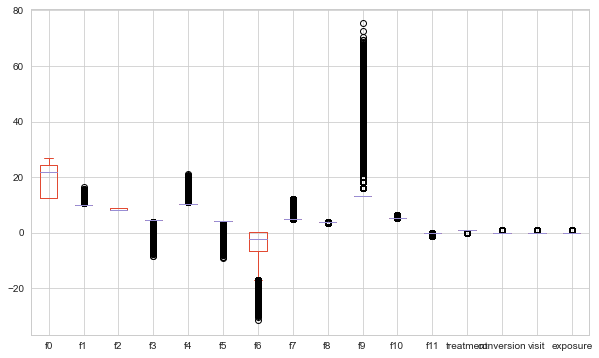

In [27]:
df.plot.box(figsize=(10,6))

<AxesSubplot:>

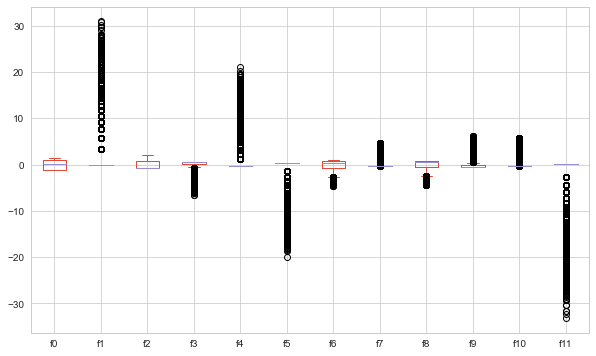

In [28]:
df_sca.plot.box(figsize=(10,6))

In [29]:
X=df_sca

In [30]:
treatment = df_ml['exposure']

In [31]:
y = df_ml['conversion']

In [32]:
models_results = {
    'approach': [],
    'uplift@30%': []}

In [33]:
X_train, X_test, treatment_train, treatment_test, y_train, y_test = train_test_split(X,treatment,y, random_state=23, stratify=treatment, test_size=0.33)

In [34]:
print(X_train.shape, X_test.shape, treatment_train.shape, treatment_test.shape, y_train.shape, y_test.shape)

(1691849, 12) (833300, 12) (1691849,) (833300,) (1691849,) (833300,)


### Run models

#### XGBoost

In [35]:
treatment_model = XGBClassifier(random_state=23)
control_model = XGBClassifier(random_state=23)
XGB = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [36]:
XGBoost_tm = XGB.fit(X_train, y_train, treatment_train)

C:\Program Files\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Program Files\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
uplift_XGB = XGBoost_tm.predict(X_test)

In [38]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_XGB, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.5466


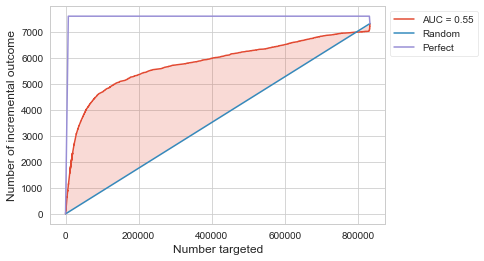

In [39]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_XGB, treatment_test, perfect=True);

#### CatBoost

In [40]:
treatment_model = CatBoostClassifier(random_state=23)
control_model = CatBoostClassifier(random_state=23)
catboost = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [42]:
catboost_tm = catboost.fit(X_train, y_train, treatment_train)

Learning rate set to 0.227502
0:	learn: 0.1816475	total: 338ms	remaining: 5m 37s
1:	learn: 0.0603191	total: 515ms	remaining: 4m 17s
2:	learn: 0.0265698	total: 696ms	remaining: 3m 51s
3:	learn: 0.0152389	total: 894ms	remaining: 3m 42s
4:	learn: 0.0114610	total: 1.07s	remaining: 3m 33s
5:	learn: 0.0099347	total: 1.25s	remaining: 3m 27s
6:	learn: 0.0092262	total: 1.44s	remaining: 3m 24s
7:	learn: 0.0088721	total: 1.64s	remaining: 3m 23s
8:	learn: 0.0086431	total: 1.84s	remaining: 3m 23s
9:	learn: 0.0085288	total: 2.05s	remaining: 3m 23s
10:	learn: 0.0084759	total: 2.24s	remaining: 3m 21s
11:	learn: 0.0084170	total: 2.45s	remaining: 3m 21s
12:	learn: 0.0083809	total: 2.63s	remaining: 3m 19s
13:	learn: 0.0083530	total: 2.82s	remaining: 3m 18s
14:	learn: 0.0083263	total: 3.01s	remaining: 3m 17s
15:	learn: 0.0083022	total: 3.19s	remaining: 3m 16s
16:	learn: 0.0082917	total: 3.37s	remaining: 3m 14s
17:	learn: 0.0082817	total: 3.54s	remaining: 3m 13s
18:	learn: 0.0082694	total: 3.72s	remaining:

159:	learn: 0.0072258	total: 34.2s	remaining: 2m 59s
160:	learn: 0.0072235	total: 34.4s	remaining: 2m 59s
161:	learn: 0.0072209	total: 34.6s	remaining: 2m 59s
162:	learn: 0.0072122	total: 34.8s	remaining: 2m 58s
163:	learn: 0.0072047	total: 35s	remaining: 2m 58s
164:	learn: 0.0072037	total: 35.2s	remaining: 2m 58s
165:	learn: 0.0071982	total: 35.4s	remaining: 2m 58s
166:	learn: 0.0071948	total: 35.6s	remaining: 2m 57s
167:	learn: 0.0071885	total: 35.9s	remaining: 2m 57s
168:	learn: 0.0071804	total: 36.1s	remaining: 2m 57s
169:	learn: 0.0071739	total: 36.3s	remaining: 2m 57s
170:	learn: 0.0071697	total: 36.5s	remaining: 2m 56s
171:	learn: 0.0071668	total: 36.7s	remaining: 2m 56s
172:	learn: 0.0071616	total: 36.9s	remaining: 2m 56s
173:	learn: 0.0071539	total: 37.1s	remaining: 2m 56s
174:	learn: 0.0071480	total: 37.3s	remaining: 2m 55s
175:	learn: 0.0071469	total: 37.5s	remaining: 2m 55s
176:	learn: 0.0071453	total: 37.7s	remaining: 2m 55s
177:	learn: 0.0071408	total: 37.9s	remaining: 2m

315:	learn: 0.0066175	total: 1m 8s	remaining: 2m 28s
316:	learn: 0.0066120	total: 1m 8s	remaining: 2m 27s
317:	learn: 0.0066115	total: 1m 8s	remaining: 2m 27s
318:	learn: 0.0066088	total: 1m 9s	remaining: 2m 27s
319:	learn: 0.0066055	total: 1m 9s	remaining: 2m 27s
320:	learn: 0.0066013	total: 1m 9s	remaining: 2m 27s
321:	learn: 0.0066005	total: 1m 9s	remaining: 2m 26s
322:	learn: 0.0065972	total: 1m 9s	remaining: 2m 26s
323:	learn: 0.0065944	total: 1m 10s	remaining: 2m 26s
324:	learn: 0.0065909	total: 1m 10s	remaining: 2m 26s
325:	learn: 0.0065851	total: 1m 10s	remaining: 2m 26s
326:	learn: 0.0065827	total: 1m 10s	remaining: 2m 25s
327:	learn: 0.0065776	total: 1m 11s	remaining: 2m 25s
328:	learn: 0.0065746	total: 1m 11s	remaining: 2m 25s
329:	learn: 0.0065725	total: 1m 11s	remaining: 2m 25s
330:	learn: 0.0065693	total: 1m 11s	remaining: 2m 25s
331:	learn: 0.0065665	total: 1m 12s	remaining: 2m 24s
332:	learn: 0.0065628	total: 1m 12s	remaining: 2m 24s
333:	learn: 0.0065614	total: 1m 12s	

469:	learn: 0.0062020	total: 1m 44s	remaining: 1m 57s
470:	learn: 0.0062011	total: 1m 44s	remaining: 1m 57s
471:	learn: 0.0061988	total: 1m 45s	remaining: 1m 58s
472:	learn: 0.0061944	total: 1m 47s	remaining: 1m 59s
473:	learn: 0.0061900	total: 1m 47s	remaining: 1m 59s
474:	learn: 0.0061896	total: 1m 48s	remaining: 2m
475:	learn: 0.0061846	total: 1m 49s	remaining: 1m 59s
476:	learn: 0.0061831	total: 1m 49s	remaining: 1m 59s
477:	learn: 0.0061788	total: 1m 49s	remaining: 1m 59s
478:	learn: 0.0061774	total: 1m 49s	remaining: 1m 59s
479:	learn: 0.0061748	total: 1m 50s	remaining: 1m 59s
480:	learn: 0.0061720	total: 1m 50s	remaining: 1m 59s
481:	learn: 0.0061714	total: 1m 50s	remaining: 1m 59s
482:	learn: 0.0061693	total: 1m 51s	remaining: 1m 58s
483:	learn: 0.0061665	total: 1m 51s	remaining: 1m 58s
484:	learn: 0.0061642	total: 1m 51s	remaining: 1m 58s
485:	learn: 0.0061626	total: 1m 52s	remaining: 1m 58s
486:	learn: 0.0061595	total: 1m 52s	remaining: 1m 58s
487:	learn: 0.0061571	total: 1m 

622:	learn: 0.0058541	total: 2m 37s	remaining: 1m 35s
623:	learn: 0.0058526	total: 2m 38s	remaining: 1m 35s
624:	learn: 0.0058502	total: 2m 38s	remaining: 1m 35s
625:	learn: 0.0058455	total: 2m 38s	remaining: 1m 34s
626:	learn: 0.0058443	total: 2m 39s	remaining: 1m 34s
627:	learn: 0.0058426	total: 2m 39s	remaining: 1m 34s
628:	learn: 0.0058403	total: 2m 39s	remaining: 1m 34s
629:	learn: 0.0058384	total: 2m 39s	remaining: 1m 33s
630:	learn: 0.0058355	total: 2m 39s	remaining: 1m 33s
631:	learn: 0.0058336	total: 2m 40s	remaining: 1m 33s
632:	learn: 0.0058293	total: 2m 40s	remaining: 1m 33s
633:	learn: 0.0058268	total: 2m 40s	remaining: 1m 32s
634:	learn: 0.0058261	total: 2m 41s	remaining: 1m 32s
635:	learn: 0.0058226	total: 2m 41s	remaining: 1m 32s
636:	learn: 0.0058216	total: 2m 41s	remaining: 1m 32s
637:	learn: 0.0058180	total: 2m 41s	remaining: 1m 31s
638:	learn: 0.0058141	total: 2m 42s	remaining: 1m 31s
639:	learn: 0.0058114	total: 2m 42s	remaining: 1m 31s
640:	learn: 0.0058076	total:

776:	learn: 0.0055491	total: 3m 16s	remaining: 56.4s
777:	learn: 0.0055477	total: 3m 16s	remaining: 56.2s
778:	learn: 0.0055451	total: 3m 17s	remaining: 55.9s
779:	learn: 0.0055431	total: 3m 17s	remaining: 55.7s
780:	learn: 0.0055413	total: 3m 17s	remaining: 55.4s
781:	learn: 0.0055392	total: 3m 17s	remaining: 55.2s
782:	learn: 0.0055374	total: 3m 18s	remaining: 54.9s
783:	learn: 0.0055357	total: 3m 18s	remaining: 54.7s
784:	learn: 0.0055354	total: 3m 18s	remaining: 54.5s
785:	learn: 0.0055331	total: 3m 19s	remaining: 54.2s
786:	learn: 0.0055301	total: 3m 19s	remaining: 53.9s
787:	learn: 0.0055255	total: 3m 19s	remaining: 53.7s
788:	learn: 0.0055231	total: 3m 19s	remaining: 53.4s
789:	learn: 0.0055227	total: 3m 19s	remaining: 53.2s
790:	learn: 0.0055216	total: 3m 20s	remaining: 52.9s
791:	learn: 0.0055203	total: 3m 20s	remaining: 52.6s
792:	learn: 0.0055201	total: 3m 20s	remaining: 52.4s
793:	learn: 0.0055185	total: 3m 20s	remaining: 52.1s
794:	learn: 0.0055173	total: 3m 21s	remaining:

931:	learn: 0.0053069	total: 3m 54s	remaining: 17.1s
932:	learn: 0.0053048	total: 3m 54s	remaining: 16.8s
933:	learn: 0.0053023	total: 3m 54s	remaining: 16.6s
934:	learn: 0.0052999	total: 3m 55s	remaining: 16.3s
935:	learn: 0.0052982	total: 3m 55s	remaining: 16.1s
936:	learn: 0.0052957	total: 3m 55s	remaining: 15.8s
937:	learn: 0.0052950	total: 3m 55s	remaining: 15.6s
938:	learn: 0.0052932	total: 3m 56s	remaining: 15.3s
939:	learn: 0.0052915	total: 3m 56s	remaining: 15.1s
940:	learn: 0.0052903	total: 3m 56s	remaining: 14.8s
941:	learn: 0.0052898	total: 3m 57s	remaining: 14.6s
942:	learn: 0.0052876	total: 3m 57s	remaining: 14.4s
943:	learn: 0.0052855	total: 3m 57s	remaining: 14.1s
944:	learn: 0.0052835	total: 3m 58s	remaining: 13.9s
945:	learn: 0.0052830	total: 3m 58s	remaining: 13.6s
946:	learn: 0.0052815	total: 3m 58s	remaining: 13.4s
947:	learn: 0.0052803	total: 3m 59s	remaining: 13.1s
948:	learn: 0.0052786	total: 3m 59s	remaining: 12.9s
949:	learn: 0.0052784	total: 3m 59s	remaining:

93:	learn: 0.1504332	total: 5.51s	remaining: 53.1s
94:	learn: 0.1503919	total: 5.56s	remaining: 53s
95:	learn: 0.1503756	total: 5.61s	remaining: 52.9s
96:	learn: 0.1503256	total: 5.68s	remaining: 52.9s
97:	learn: 0.1503086	total: 5.74s	remaining: 52.8s
98:	learn: 0.1502719	total: 5.79s	remaining: 52.7s
99:	learn: 0.1502312	total: 5.85s	remaining: 52.7s
100:	learn: 0.1502094	total: 5.91s	remaining: 52.6s
101:	learn: 0.1501875	total: 5.97s	remaining: 52.6s
102:	learn: 0.1501687	total: 6.04s	remaining: 52.6s
103:	learn: 0.1501481	total: 6.09s	remaining: 52.4s
104:	learn: 0.1501325	total: 6.14s	remaining: 52.3s
105:	learn: 0.1501126	total: 6.19s	remaining: 52.2s
106:	learn: 0.1500797	total: 6.25s	remaining: 52.2s
107:	learn: 0.1500484	total: 6.31s	remaining: 52.1s
108:	learn: 0.1500396	total: 6.37s	remaining: 52.1s
109:	learn: 0.1499998	total: 6.43s	remaining: 52s
110:	learn: 0.1499626	total: 6.49s	remaining: 52s
111:	learn: 0.1499331	total: 6.54s	remaining: 51.9s
112:	learn: 0.1499005	tot

253:	learn: 0.1465964	total: 15.1s	remaining: 44.2s
254:	learn: 0.1465720	total: 15.1s	remaining: 44.2s
255:	learn: 0.1465465	total: 15.2s	remaining: 44.1s
256:	learn: 0.1465251	total: 15.3s	remaining: 44.1s
257:	learn: 0.1464989	total: 15.3s	remaining: 44.1s
258:	learn: 0.1464798	total: 15.4s	remaining: 44s
259:	learn: 0.1464587	total: 15.4s	remaining: 43.9s
260:	learn: 0.1464322	total: 15.5s	remaining: 43.9s
261:	learn: 0.1464048	total: 15.6s	remaining: 43.8s
262:	learn: 0.1463749	total: 15.6s	remaining: 43.8s
263:	learn: 0.1463501	total: 15.7s	remaining: 43.7s
264:	learn: 0.1463321	total: 15.7s	remaining: 43.7s
265:	learn: 0.1463213	total: 15.8s	remaining: 43.6s
266:	learn: 0.1462969	total: 15.9s	remaining: 43.5s
267:	learn: 0.1462651	total: 15.9s	remaining: 43.5s
268:	learn: 0.1462408	total: 16s	remaining: 43.4s
269:	learn: 0.1462326	total: 16s	remaining: 43.3s
270:	learn: 0.1462086	total: 16.1s	remaining: 43.3s
271:	learn: 0.1461793	total: 16.1s	remaining: 43.2s
272:	learn: 0.1461

412:	learn: 0.1434966	total: 24.5s	remaining: 34.8s
413:	learn: 0.1434839	total: 24.5s	remaining: 34.7s
414:	learn: 0.1434630	total: 24.6s	remaining: 34.6s
415:	learn: 0.1434474	total: 24.6s	remaining: 34.6s
416:	learn: 0.1434275	total: 24.7s	remaining: 34.5s
417:	learn: 0.1434161	total: 24.7s	remaining: 34.5s
418:	learn: 0.1433946	total: 24.8s	remaining: 34.4s
419:	learn: 0.1433763	total: 24.9s	remaining: 34.3s
420:	learn: 0.1433650	total: 24.9s	remaining: 34.3s
421:	learn: 0.1433476	total: 25s	remaining: 34.2s
422:	learn: 0.1433330	total: 25s	remaining: 34.1s
423:	learn: 0.1433133	total: 25.1s	remaining: 34.1s
424:	learn: 0.1432876	total: 25.1s	remaining: 34s
425:	learn: 0.1432658	total: 25.2s	remaining: 33.9s
426:	learn: 0.1432516	total: 25.3s	remaining: 33.9s
427:	learn: 0.1432340	total: 25.3s	remaining: 33.8s
428:	learn: 0.1432190	total: 25.4s	remaining: 33.8s
429:	learn: 0.1432028	total: 25.4s	remaining: 33.7s
430:	learn: 0.1431895	total: 25.5s	remaining: 33.7s
431:	learn: 0.1431

574:	learn: 0.1408173	total: 33.8s	remaining: 25s
575:	learn: 0.1407997	total: 33.9s	remaining: 24.9s
576:	learn: 0.1407740	total: 33.9s	remaining: 24.9s
577:	learn: 0.1407624	total: 34s	remaining: 24.8s
578:	learn: 0.1407486	total: 34s	remaining: 24.8s
579:	learn: 0.1407381	total: 34.1s	remaining: 24.7s
580:	learn: 0.1407273	total: 34.2s	remaining: 24.6s
581:	learn: 0.1407035	total: 34.2s	remaining: 24.6s
582:	learn: 0.1406928	total: 34.3s	remaining: 24.5s
583:	learn: 0.1406757	total: 34.3s	remaining: 24.4s
584:	learn: 0.1406533	total: 34.4s	remaining: 24.4s
585:	learn: 0.1406344	total: 34.4s	remaining: 24.3s
586:	learn: 0.1406138	total: 34.5s	remaining: 24.3s
587:	learn: 0.1405977	total: 34.5s	remaining: 24.2s
588:	learn: 0.1405700	total: 34.6s	remaining: 24.1s
589:	learn: 0.1405503	total: 34.7s	remaining: 24.1s
590:	learn: 0.1405270	total: 34.7s	remaining: 24s
591:	learn: 0.1405145	total: 34.8s	remaining: 24s
592:	learn: 0.1404947	total: 34.8s	remaining: 23.9s
593:	learn: 0.1404812	

733:	learn: 0.1382303	total: 43.9s	remaining: 15.9s
734:	learn: 0.1382185	total: 43.9s	remaining: 15.8s
735:	learn: 0.1382040	total: 44s	remaining: 15.8s
736:	learn: 0.1381822	total: 44.1s	remaining: 15.7s
737:	learn: 0.1381707	total: 44.1s	remaining: 15.7s
738:	learn: 0.1381512	total: 44.2s	remaining: 15.6s
739:	learn: 0.1381357	total: 44.3s	remaining: 15.5s
740:	learn: 0.1381243	total: 44.3s	remaining: 15.5s
741:	learn: 0.1381083	total: 44.4s	remaining: 15.4s
742:	learn: 0.1380760	total: 44.5s	remaining: 15.4s
743:	learn: 0.1380588	total: 44.5s	remaining: 15.3s
744:	learn: 0.1380432	total: 44.6s	remaining: 15.3s
745:	learn: 0.1380248	total: 44.6s	remaining: 15.2s
746:	learn: 0.1380080	total: 44.7s	remaining: 15.1s
747:	learn: 0.1379929	total: 44.8s	remaining: 15.1s
748:	learn: 0.1379766	total: 44.8s	remaining: 15s
749:	learn: 0.1379655	total: 44.9s	remaining: 15s
750:	learn: 0.1379526	total: 45s	remaining: 14.9s
751:	learn: 0.1379436	total: 45s	remaining: 14.8s
752:	learn: 0.1379241	

894:	learn: 0.1358358	total: 54.3s	remaining: 6.37s
895:	learn: 0.1358189	total: 54.3s	remaining: 6.31s
896:	learn: 0.1358059	total: 54.4s	remaining: 6.25s
897:	learn: 0.1357849	total: 54.5s	remaining: 6.19s
898:	learn: 0.1357680	total: 54.5s	remaining: 6.13s
899:	learn: 0.1357521	total: 54.6s	remaining: 6.07s
900:	learn: 0.1357372	total: 54.7s	remaining: 6.01s
901:	learn: 0.1357223	total: 54.8s	remaining: 5.95s
902:	learn: 0.1357082	total: 54.9s	remaining: 5.89s
903:	learn: 0.1356926	total: 54.9s	remaining: 5.83s
904:	learn: 0.1356818	total: 55s	remaining: 5.78s
905:	learn: 0.1356638	total: 55.1s	remaining: 5.72s
906:	learn: 0.1356535	total: 55.2s	remaining: 5.66s
907:	learn: 0.1356435	total: 55.3s	remaining: 5.6s
908:	learn: 0.1356363	total: 55.3s	remaining: 5.54s
909:	learn: 0.1356172	total: 55.4s	remaining: 5.48s
910:	learn: 0.1355993	total: 55.5s	remaining: 5.42s
911:	learn: 0.1355869	total: 55.5s	remaining: 5.36s
912:	learn: 0.1355830	total: 55.6s	remaining: 5.3s
913:	learn: 0.13

In [43]:
uplift_catboost = catboost_tm.predict(X_test)

In [44]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_catboost, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.5350


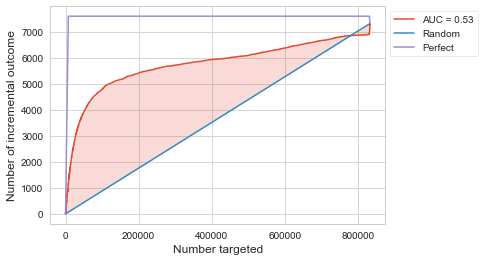

In [45]:
# with ideal Qini curve (red line)
# perfect=True
# CatBoost
plot_qini_curve(y_test, uplift_catboost, treatment_test, perfect=True);

#### Logistic Regresssion

In [145]:
Xt = pd.concat([X,treatment],axis=1)
Xty = pd.concat([Xt,y],axis=1)
XTy1 = Xty[Xty.exposure ==1]
XTy0 = Xty[Xty.exposure ==0]


In [152]:
y1 = XTy1.conversion
y0 = XTy0.conversion
XT1 = XTy1.drop(['conversion'], axis=1)
XT0 = XTy0.drop(['conversion'], axis=1)

In [ ]:
%%time
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(XT0, y0)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
#Treatment Set
#Best Score: 0.9484032844933152
#Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}



In [137]:
treatment_model = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'liblinear', random_state=23)
control_model = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'liblinear', random_state=23)
LogReg = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [138]:
logreg_tm = LogReg.fit(X_train, y_train, treatment_train)
uplift_logreg = logreg_tm.predict(X_test)
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_logreg, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.6523


##### C= 1, penalty= 'l1', solver= 'liblinear'  -------> 0.6629
##### C= 0.01, penalty= 'l1', solver= 'saga ---------> 0.6692

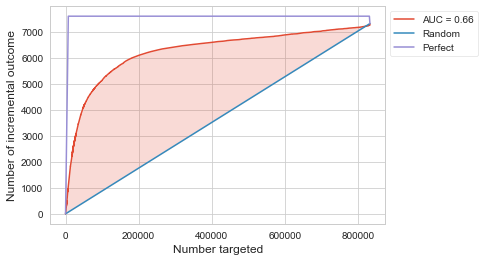

In [118]:
# with ideal Qini curve (red line)
# perfect=True

plot_qini_curve(y_test, uplift_logreg, treatment_test, perfect=True);

#### LightGBM

In [61]:
treatment_model = LGBMClassifier(random_state=23)
control_model = LGBMClassifier(random_state=23)
lgbm = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [62]:
lgbm_tm = lgbm.fit(X_train, y_train, treatment_train)

In [63]:
uplift_lgbm = lgbm_tm.predict(X_test)

In [65]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_lgbm, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.4719


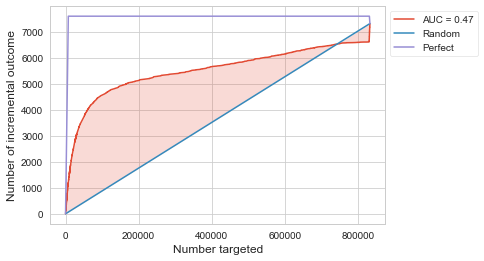

In [66]:
# with ideal Qini curve (red line)
# perfect=True
# CatBoost
plot_qini_curve(y_test, uplift_lgbm, treatment_test, perfect=True);

#### Histogram-Based Gradient Boosting Machine for Classification

In [68]:
treatment_model = HistGradientBoostingClassifier(random_state=23)
control_model = HistGradientBoostingClassifier(random_state=23)
hgbc = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [69]:
hgbc = hgbc.fit(X_train, y_train, treatment_train)

In [70]:
uplift_hgbc = hgbc.predict(X_test)

In [71]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_hgbc, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.4446


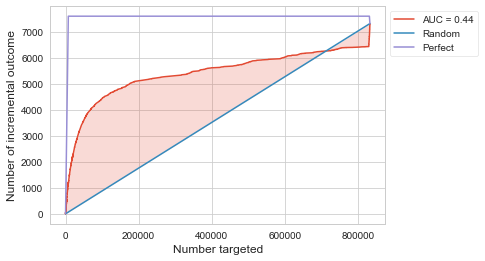

In [72]:
# with ideal Qini curve (red line)
# perfect=True
# CatBoost
plot_qini_curve(y_test, uplift_hgbc, treatment_test, perfect=True);

#### Decision Tree Classifier

In [74]:
treatment_model = DecisionTreeClassifier(random_state=23)
control_model = DecisionTreeClassifier(random_state=23)
dtc = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [75]:
dtc = dtc.fit(X_train, y_train, treatment_train)

In [76]:
uplift_dtc = dtc.predict(X_test)

In [77]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_dtc, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.0857


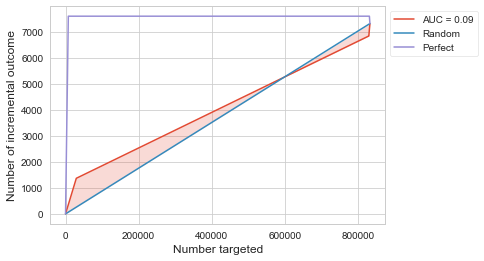

In [79]:
# with ideal Qini curve (red line)
# perfect=True
# CatBoost
plot_qini_curve(y_test, uplift_dtc, treatment_test, perfect=True);

#### Random Forest Classifier

In [81]:
treatment_model = RandomForestClassifier(random_state=23)
control_model = RandomForestClassifier(random_state=23)
rfc = TwoModels(estimator_trmnt = treatment_model, estimator_ctrl = control_model, method='vanilla')

In [83]:
rfc = rfc.fit(X_train, y_train, treatment_train)

In [84]:
uplift_rfc = rfc.predict(X_test)

In [85]:
# AUQC = area under Qini curve = Qini coefficient
auqc = qini_auc_score(y_test, uplift_rfc, treatment_test) 
print(f"Qini coefficient on full data: {auqc:.4f}")

Qini coefficient on full data: 0.5412


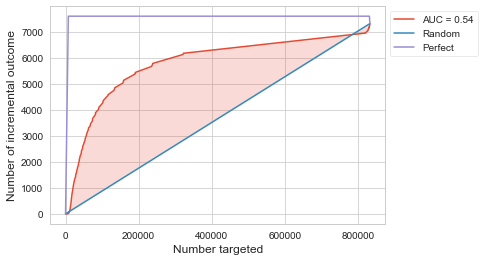

In [86]:
# with ideal Qini curve (red line)
# perfect=True
# CatBoost
plot_qini_curve(y_test, uplift_rfc, treatment_test, perfect=True);